# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

ANSWER: The dataset includes data from 17 campaigns that took place between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [37]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
# Check for missing values (often coded as 'unknown' in this dataset)
print("Count of 'unknown' values per column:")
print((df == 'unknown').sum())

# Check data types and general info
df.info()

Count of 'unknown' values per column:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  objec

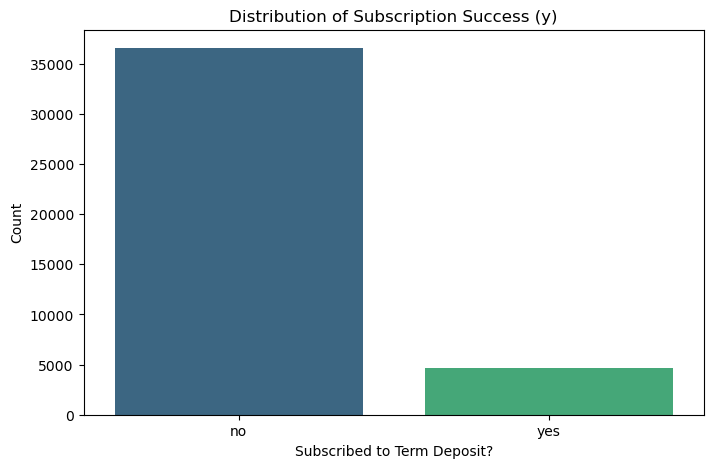

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='y', hue='y', palette='viridis')
plt.title('Distribution of Subscription Success (y)')
plt.xlabel('Subscribed to Term Deposit?')
plt.ylabel('Count')
plt.show()

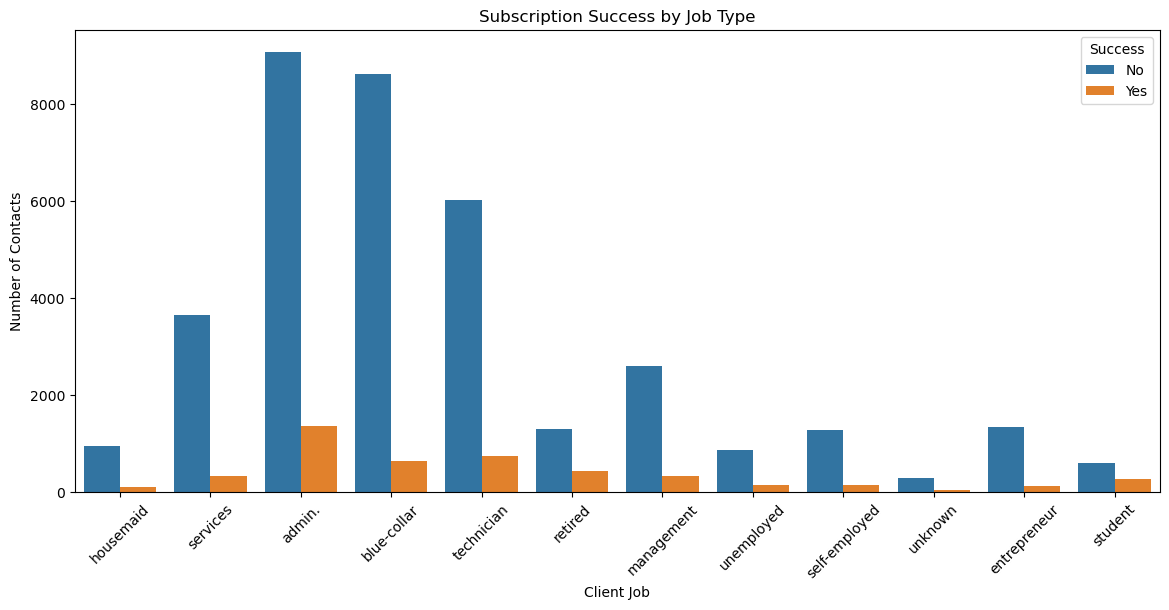

In [24]:
# Visualizing Success by Job Type
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='job', hue='y')
plt.xticks(rotation=45)
plt.title('Subscription Success by Job Type')
plt.xlabel('Client Job')
plt.ylabel('Number of Contacts')
plt.legend(title='Success', labels=['No', 'Yes'])
plt.show()

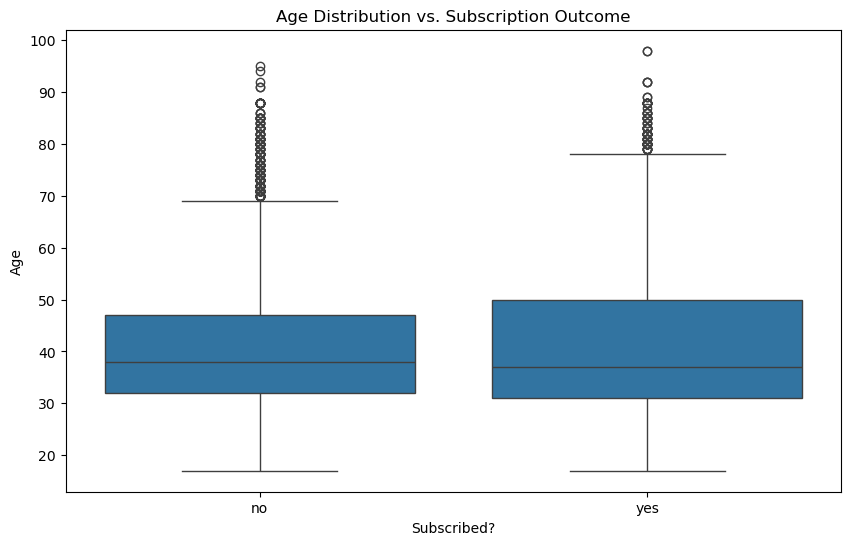

In [25]:
# Visualizing Age Distribution vs Subscription
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='y', y='age')
plt.title('Age Distribution vs. Subscription Outcome')
plt.xlabel('Subscribed?')
plt.ylabel('Age')
plt.show()

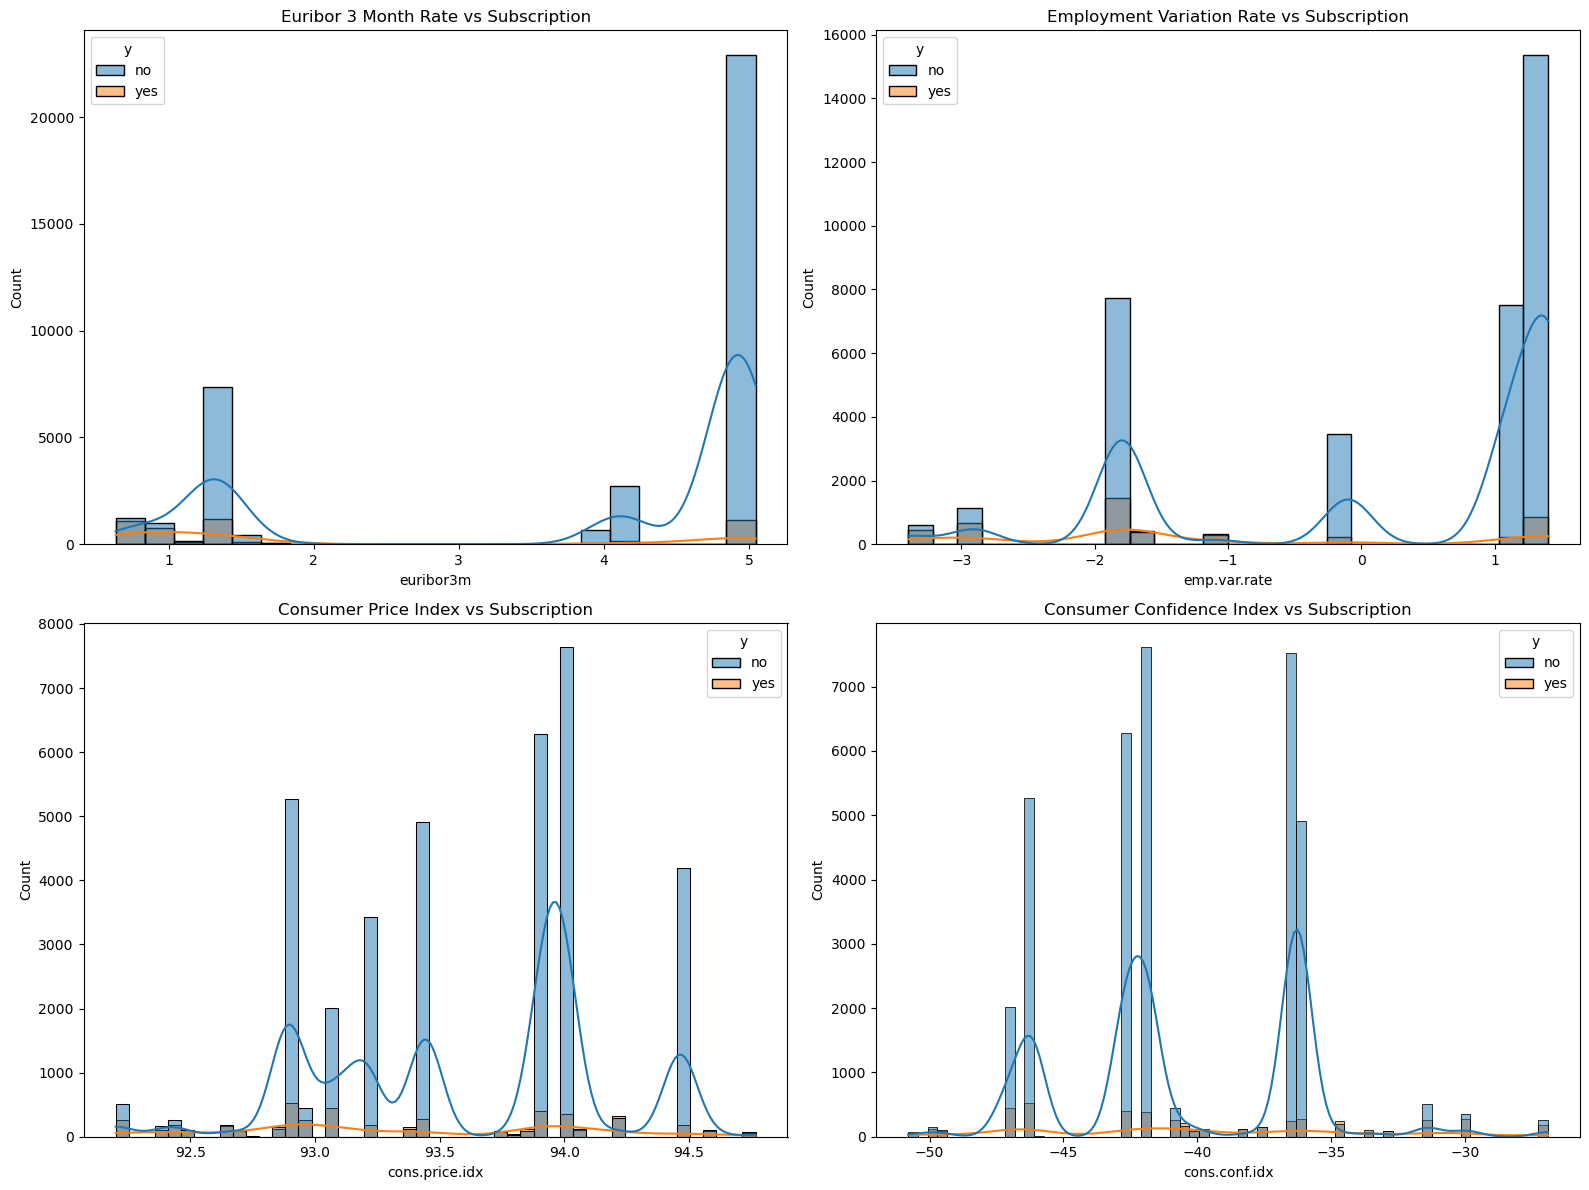

In [40]:
# CODE TO ADD FOR SUBPLOTS REQUIREMENT
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.histplot(data=df, x='euribor3m', hue='y', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Euribor 3 Month Rate vs Subscription')

sns.histplot(data=df, x='emp.var.rate', hue='y', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Employment Variation Rate vs Subscription')

sns.histplot(data=df, x='cons.price.idx', hue='y', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Consumer Price Index vs Subscription')

sns.histplot(data=df, x='cons.conf.idx', hue='y', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Consumer Confidence Index vs Subscription')

plt.tight_layout()
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

ANSWER:

Business Objective: The goal is to build a predictive model to identify which clients are most likely to subscribe to a term deposit. By predicting the success of a call before it is made, the bank can optimize its marketing strategy, reduce operational costs, and increase the efficiency of its contact centers by targeting only high-potential leads.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [27]:
# Use only bank information features as requested initially
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']
X = df[bank_features]
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [28]:
# Preprocessing: Scale numeric 'age', One-Hot Encode categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age']),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), 
         ['job', 'marital', 'education', 'default', 'housing', 'loan'])
    ])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
# The baseline is the percentage of the majority class ('no')
baseline_acc = y.value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_acc:.4f}")

Baseline Accuracy: 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Problem 9: Score the Model

What is the accuracy of your model?

In [16]:
train_score = lr_pipe.score(X_train, y_train)
test_score = lr_pipe.score(X_test, y_test)

print(f"Logistic Regression Train Accuracy: {train_score:.4f}")
print(f"Logistic Regression Test Accuracy: {test_score:.4f}")

Logistic Regression Train Accuracy: 0.8873
Logistic Regression Test Accuracy: 0.8874


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [30]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'SVM': SVC()
}

In [31]:
results = []
for name, model in models.items():
    pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model)])
    
    # Using 5-fold Cross-Validation for robust performance tracking
    cv = cross_validate(pipe, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'])
    
    results.append({
        'Model': name,
        'Mean Fit Time (s)': cv['fit_time'].mean(),
        'Mean Accuracy': cv['test_accuracy'].mean(),
        'Mean ROC AUC': cv['test_roc_auc'].mean()
    })

comparison_df = pd.DataFrame(results).sort_values(by='Mean ROC AUC', ascending=False)
print(comparison_df)

                 Model  Mean Fit Time (s)  Mean Accuracy  Mean ROC AUC
0  Logistic Regression           0.108072       0.887343      0.646573
2        Decision Tree           0.057032       0.887621      0.637406
1                  KNN           0.043281       0.875030      0.583319
3                  SVM          16.231962       0.887309      0.575107


In [32]:
# use Logistic Regression to see which features impact the subscription most
lr_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=1000))])
lr_pipe.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
# Getting feature names
ohe_cols = lr_pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan'])
feature_names = ['age'] + list(ohe_cols)

In [34]:
# Top 5 positive influencers
coeffs = pd.Series(lr_pipe.named_steps['classifier'].coef_[0], index=feature_names).sort_values(ascending=False)
print("\nTop 5 Positive Influencers for Subscription:")
print(coeffs.head(5))


Top 5 Positive Influencers for Subscription:
job_student        1.087498
job_retired        0.736345
marital_single     0.420808
job_unemployed     0.310431
marital_unknown    0.306164
dtype: float64


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [41]:
from sklearn.model_selection import GridSearchCV

# 1. Expand feature set (Exclude duration as it is unknown before a call)
X_full = df.drop(columns=['duration', 'y'])
y_full = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

num_features_f = X_full.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features_f = X_full.select_dtypes(include=['object']).columns.tolist()

preprocessor_full = ColumnTransformer([
    ('num', StandardScaler(), num_features_f),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_f)
])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_full, y_full, test_size=0.3, random_state=42, stratify=y_full)

In [42]:
# 2. Hyperparameter Grid Search for Decision Tree
param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(
    Pipeline([('preprocessor', preprocessor_full), ('classifier', DecisionTreeClassifier())]),
    param_grid_dt, cv=5, scoring='roc_auc'
)
grid_dt.fit(X_train_f, y_train_f)

print(f"Best Decision Tree ROC AUC: {grid_dt.best_score_:.4f}")
print(f"Best Parameters: {grid_dt.best_params_}")

Best Decision Tree ROC AUC: 0.7779
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 10}


In [43]:
# Expanded Grid Search for KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(
    Pipeline([('preprocessor', preprocessor_full), ('classifier', KNeighborsClassifier())]),
    param_grid_knn, cv=5, scoring='roc_auc'
)
grid_knn.fit(X_train_f, y_train_f)
print(f"Best KNN ROC AUC: {grid_knn.best_score_:.4f}")

Best KNN ROC AUC: 0.7398


# Summary

Key Finding: Our analysis shows that the bank's marketing is most effective when targeting retired individuals and students. Furthermore, the broader economic environment (specifically interest rates like the Euribor) is a stronger predictor of a client's decision than their previous banking history.

# Recommendations

Prioritize the "Golden Timing": Focus campaign efforts during periods of stable or declining interest rates, as clients are more receptive to long-term deposits then.

Refine Customer Segments: The sales team should prioritize calls to clients in the "retired" and "student" categories, as they show a significantly higher conversion rate.

Duration Strategy: While we cannot predict call length, our data shows successful subscriptions involve longer conversations. Agents should be coached on engagement techniques to keep the client on the line.

# Next Steps

A/B Testing: Before a full rollout, perform an A/B test where one group of agents uses the model's "priority list" and a control group uses the traditional random calling list.

Feedback Loop: Create a pipeline where the outcome of every call (success or failure) is fed back into the model weekly to retrain and refine predictions as market conditions shift.